In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise import KNNBasic, KNNWithMeans, KNNWithZScore
from surprise import SVD, SVDpp, NMF
from surprise import SlopeOne, CoClustering

In [2]:
df_books = pd.read_csv('/.spyder-py3/files/input/books.csv')
df_books = df_books.drop_duplicates(subset = ['original_title'])
df_books = df_books.dropna(subset = ['original_title'])
df_books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9274 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    9274 non-null   int64  
 1   goodreads_book_id          9274 non-null   int64  
 2   best_book_id               9274 non-null   int64  
 3   work_id                    9274 non-null   int64  
 4   books_count                9274 non-null   int64  
 5   isbn                       8728 non-null   object 
 6   isbn13                     8828 non-null   float64
 7   authors                    9274 non-null   object 
 8   original_publication_year  9268 non-null   float64
 9   original_title             9274 non-null   object 
 10  title                      9274 non-null   object 
 11  language_code              8281 non-null   object 
 12  average_rating             9274 non-null   float64
 13  ratings_count              9274 non-null   int64

In [3]:
df_ratings = pd.read_csv('/.spyder-py3/files/input/ratings.csv')
df_ratings = df_ratings.drop_duplicates()
df_ratings = df_ratings.dropna()
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5976479 entries, 0 to 5976478
Data columns (total 3 columns):
 #   Column   Dtype
---  ------   -----
 0   user_id  int64
 1   book_id  int64
 2   rating   int64
dtypes: int64(3)
memory usage: 182.4 MB


In [4]:
df_books = df_books[df_books.book_id.isin(df_ratings.book_id)]
df_ratings = df_ratings[df_ratings.book_id.isin(df_books.book_id)]
print(df_ratings.info())
print(df_books.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5781630 entries, 0 to 5976477
Data columns (total 3 columns):
 #   Column   Dtype
---  ------   -----
 0   user_id  int64
 1   book_id  int64
 2   rating   int64
dtypes: int64(3)
memory usage: 176.4 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9274 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    9274 non-null   int64  
 1   goodreads_book_id          9274 non-null   int64  
 2   best_book_id               9274 non-null   int64  
 3   work_id                    9274 non-null   int64  
 4   books_count                9274 non-null   int64  
 5   isbn                       8728 non-null   object 
 6   isbn13                     8828 non-null   float64
 7   authors                    9274 non-null   object 
 8   original_publication_year  9268 non-null   float64
 9   original_title 

In [5]:
df = df_ratings.copy()
df = df.iloc[:50000, :]


In [6]:
df = df.sample(frac = 1, random_state = 42)

reader = Reader(rating_scale=(1, 5))
                  
data = Dataset.load_from_df(df[['user_id','book_id','rating']], reader)

In [7]:
knnbasic_cv = cross_validate(KNNBasic(), data, cv=5, n_jobs=5, verbose=False)
knnmeans_cv = cross_validate(KNNWithMeans(), data, cv=5, n_jobs=5, verbose=False)
knnz_cv = cross_validate(KNNWithZScore(), data, cv=5, n_jobs=5, verbose=False)

In [8]:
svd_cv = cross_validate(SVD(), data, cv=5, n_jobs=5, verbose=False)
svdpp_cv = cross_validate(SVDpp(), data, cv=5, n_jobs=5, verbose=False)
nmf_cv = cross_validate(NMF(), data, cv=5, n_jobs=5, verbose=False)

In [9]:
slope_cv = cross_validate(SlopeOne(), data, cv=5, n_jobs=5, verbose=False)
coclus_cv = cross_validate(CoClustering(), data, cv=5, n_jobs=5, verbose=False)

In [10]:
print('Algorithm\t RMSE\t\t MAE')
print()
print('KNN Basic', '\t', round(knnbasic_cv['test_rmse'].mean(), 4), '\t', round(knnbasic_cv['test_mae'].mean(), 4))
print('KNN Means', '\t', round(knnmeans_cv['test_rmse'].mean(), 4), '\t', round(knnmeans_cv['test_mae'].mean(), 4))
print('KNN ZScore', '\t', round(knnz_cv['test_rmse'].mean(), 4), '\t', round(knnz_cv['test_mae'].mean(), 4))
print()
print('SVD', '\t\t', round(svd_cv['test_rmse'].mean(), 4), '\t', round(svd_cv['test_mae'].mean(), 4))
print('SVDpp', '\t\t', round(svdpp_cv['test_rmse'].mean(), 4), '\t', round(svdpp_cv['test_mae'].mean(), 4))
print('NMF', '\t\t', round(nmf_cv['test_rmse'].mean(), 4), '\t', round(nmf_cv['test_mae'].mean(), 4))
print()
print('SlopeOne', '\t', round(slope_cv['test_rmse'].mean(), 4), '\t', round(slope_cv['test_mae'].mean(), 4))
print('CoClustering', '\t', round(coclus_cv['test_rmse'].mean(), 4), '\t', round(coclus_cv['test_mae'].mean(), 4))
print()

Algorithm	 RMSE		 MAE

KNN Basic 	 0.9812 	 0.7791
KNN Means 	 0.9372 	 0.7385
KNN ZScore 	 0.9346 	 0.7349

SVD 		 0.9165 	 0.7298
SVDpp 		 0.9116 	 0.7235
NMF 		 0.9912 	 0.7851

SlopeOne 	 0.9511 	 0.7512
CoClustering 	 0.9637 	 0.7604



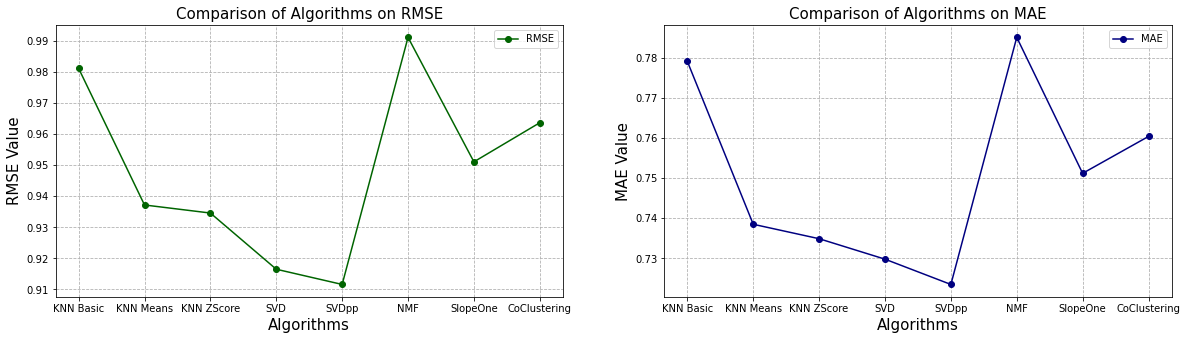

In [11]:
x_algo = ['KNN Basic', 'KNN Means', 'KNN ZScore', 'SVD', 'SVDpp', 'NMF', 'SlopeOne', 'CoClustering']
all_algos_cv = [knnbasic_cv, knnmeans_cv, knnz_cv, svd_cv, svdpp_cv, nmf_cv, slope_cv, coclus_cv]

rmse_cv = [round(res['test_rmse'].mean(), 4) for res in all_algos_cv]
mae_cv = [round(res['test_mae'].mean(), 4) for res in all_algos_cv]

plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
plt.title('Comparison of Algorithms on RMSE', loc='center', fontsize=15)
plt.plot(x_algo, rmse_cv, label='RMSE', color='darkgreen', marker='o')
plt.xlabel('Algorithms', fontsize=15)
plt.ylabel('RMSE Value', fontsize=15)
plt.legend()
plt.grid(ls='dashed')

plt.subplot(1, 2, 2)
plt.title('Comparison of Algorithms on MAE', loc='center', fontsize=15)
plt.plot(x_algo, mae_cv, label='MAE', color='navy', marker='o')
plt.xlabel('Algorithms', fontsize=15)
plt.ylabel('MAE Value', fontsize=15)
plt.legend()
plt.grid(ls='dashed')

plt.show()